# Plotting Aggregate Data with LinkML-Store

This notebook demonstrates how to use the LinkML-Store plotting functionality to create heatmaps from aggregated data. Heatmaps are an excellent visualization tool for showing relationships between two categorical variables, with color representing the frequency or another value.

## 1. Introduction to Heatmaps

A heatmap is a graphical representation of data where values are represented by colors. They are particularly useful for visualizing:

- Frequency distributions across two categorical variables
- Correlation matrices
- Gene expression data
- Any tabular data where patterns across two dimensions are important

LinkML-Store provides a powerful heatmap visualization tool that supports features like:

- Automatic frequency counting or using explicit values
- Hierarchical clustering of rows and/or columns
- Customizable appearance (colors, sizes, annotations)
- Direct piping of data from query results

## 2. Command-Line Usage

The most efficient way to create heatmaps is through the LinkML-Store command-line interface. Let's look at how to do this with a real example.

### 2.1 Querying Data

First, we need to get some data to visualize. In this example, we'll query a database for Gene Ontology annotations. We'll extract bioentity information, annotation class labels, and taxon labels:

In [1]:
# Query data from the amigo database
!linkml-store -d amigo query \
    -s '[bioentity,annotation_class_label,taxon_label]' \
    -w "{isa_partof_closure: GO:0140566, document_category: annotation}" \
    -l 999999 \
    -O csv > output/gene_annotations.csv

This command:
- Connects to the `amigo` database
- Selects three columns: `bioentity`, `annotation_class_label`, and `taxon_label`
- Filters for annotations with the specified GO term in their closure 
- Sets a high limit to get all matching records
- Outputs the results in CSV format

Let's look at the first few rows of the data to understand what we're working with:

In [2]:
!head -n 5 output/gene_annotations.csv

bioentity,annotation_class_label,taxon_label
UniProtKB:F7DNC9,histone H3K9me2/3 reader activity,Monodelphis domestica
UniProtKB:F7DNC9,histone H3K27me3 reader activity,Monodelphis domestica
UniProtKB:Q5R737,histone H4K20me2 reader activity,Pongo abelii
UniProtKB:P34089,histone H3K4me3 reader activity,Oryctolagus cuniculus


### 2.2 Creating a Heatmap

Now that we have our data, we can create a heatmap to visualize the relationship between annotation classes and taxa:

In [3]:
!cat output/gene_annotations.csv | \
    linkml-store plot heatmap \
    -f csv \
    -x annotation_class_label \
    -y taxon_label \
    --cluster both \
    --cluster-method ward \
    --cluster-metric cosine \
    -o output/heatmap.png

Heatmap created at output/heatmap.png


This command creates a heatmap with:

- Annotation class labels on the x-axis
- Taxon labels on the y-axis
- Cell values representing the count of occurrences of each x-y combination
- Hierarchical clustering on both axes using:
  - Ward's method for linkage (minimizes variance within clusters)
  - Cosine similarity as the distance metric (good for count data)

Let's display the resulting heatmap:

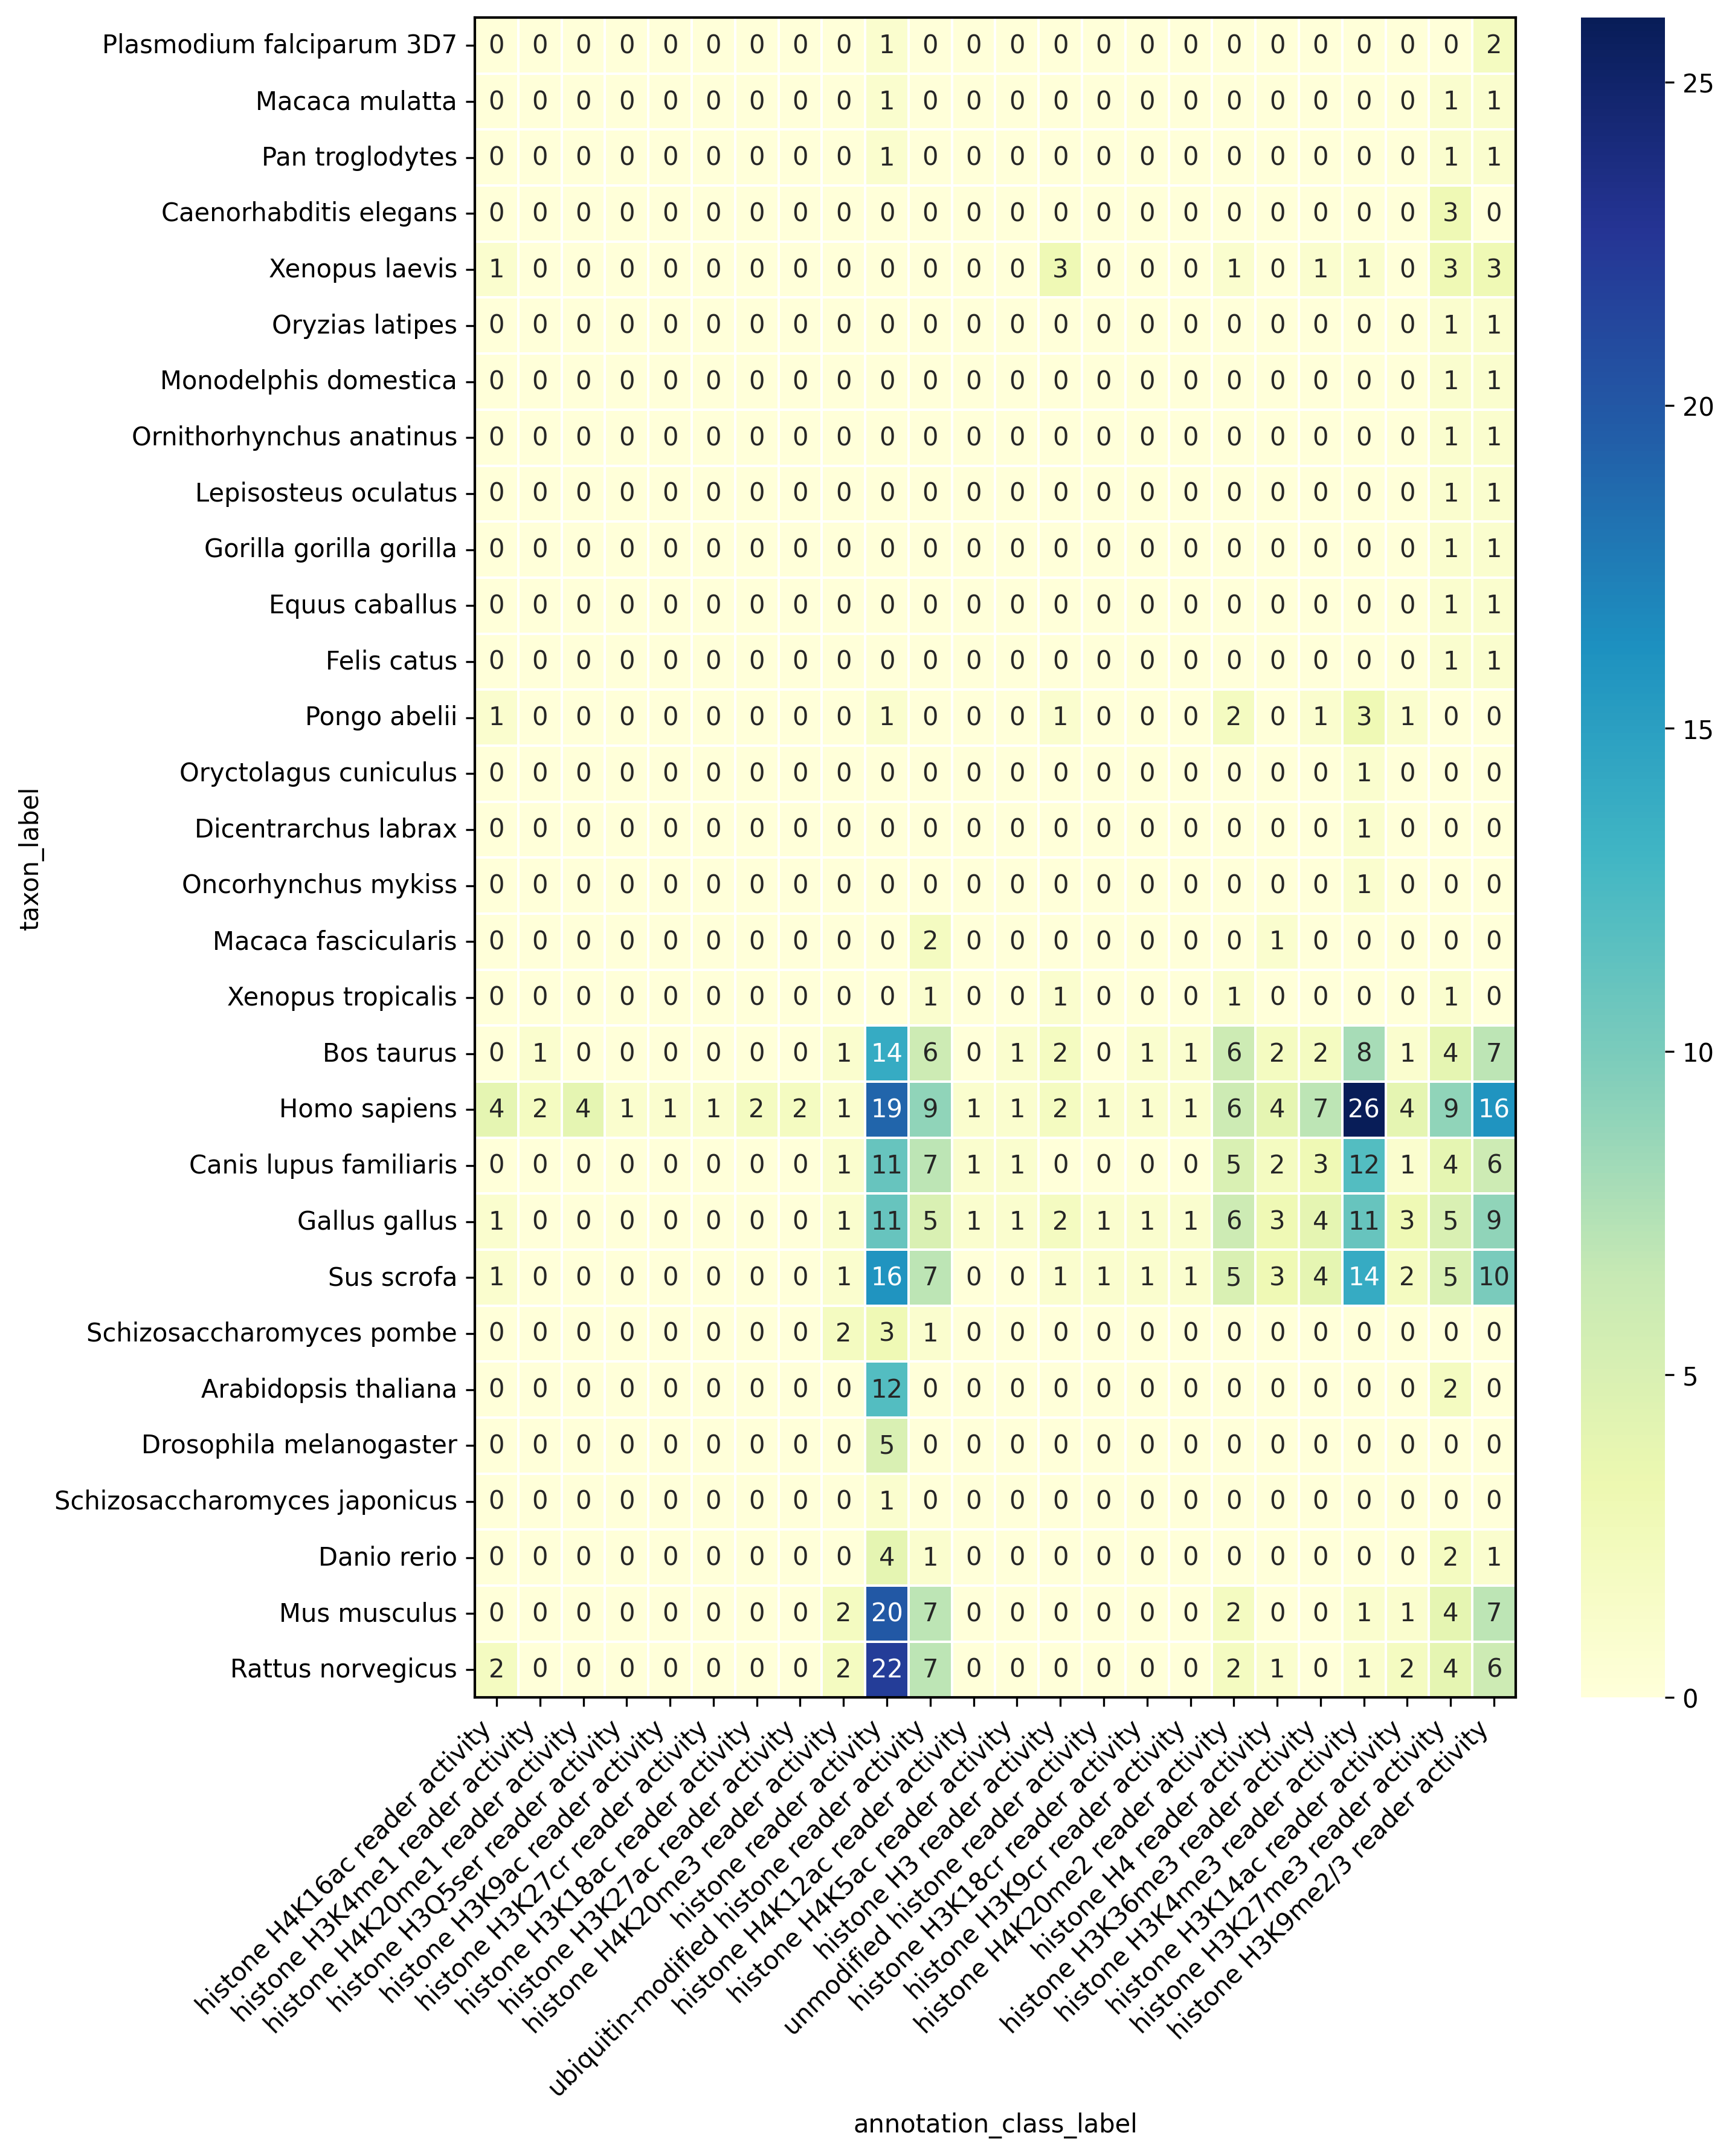

In [4]:
from IPython.display import Image
Image(filename='output/heatmap.png', width=800)

## 3. Understanding the Heatmap Options

The heatmap command has many options for customizing the visualization. Let's explore some of the key options:

### 3.1 Clustering Options

Clustering allows you to rearrange rows and columns to reveal patterns in the data:

- `--cluster`: Specify which axes to cluster (`none`, `both`, `x`, or `y`)
- `--cluster-method`: The linkage method for hierarchical clustering:
  - `complete`: Maximum distance between elements (helps find compact clusters)
  - `average`: Average distance between clusters (balanced approach)
  - `single`: Minimum distance between elements (can lead to chaining)
  - `ward`: Minimizes variance within clusters (usually creates compact clusters)
- `--cluster-metric`: The distance metric for clustering:
  - `euclidean`: Straight-line distance (good for continuous data)
  - `cosine`: Angle between vectors (good for count data, ignores magnitude)
  - `correlation`: Similar to cosine but centers the data (good for pattern matching)
  - `cityblock`: Manhattan distance (sum of absolute differences)

### 3.2 Appearance Options

- `--cmap`: Color map to use (default: "YlGnBu")
- `--width` and `--height`: Figure dimensions in inches
- `--square`: Make cells square instead of rectangular
- `--annotate/--no-annotate`: Show/hide value annotations in cells
- `--font-size`: Font size for annotations and labels
- `--dpi`: Resolution for the output image

### 3.3 Data Handling Options

- `-f`/`--format`: Input file format (csv, tsv, json, etc.)
- `-v`/`--value-column`: Use a specific column for cell values instead of counts
- `--remove-duplicates/--no-remove-duplicates`: Control how duplicate x,y combinations are handled
- `--robust`: Use robust quantiles for color scaling

## 4. Creating a Custom Heatmap

Let's create a more customized heatmap with different options:

In [5]:
!cat output/gene_annotations.csv | \
    linkml-store plot heatmap \
    -f csv \
    -x annotation_class_label \
    -y taxon_label \
    --cluster y \
    --cluster-method average \
    --cluster-metric correlation \
    --cmap "Reds" \
    --title "Gene Annotations by Taxon" \
    --square \
    --no-annotate \
    --robust \
    -o output/custom_heatmap.png

Heatmap created at output/custom_heatmap.png


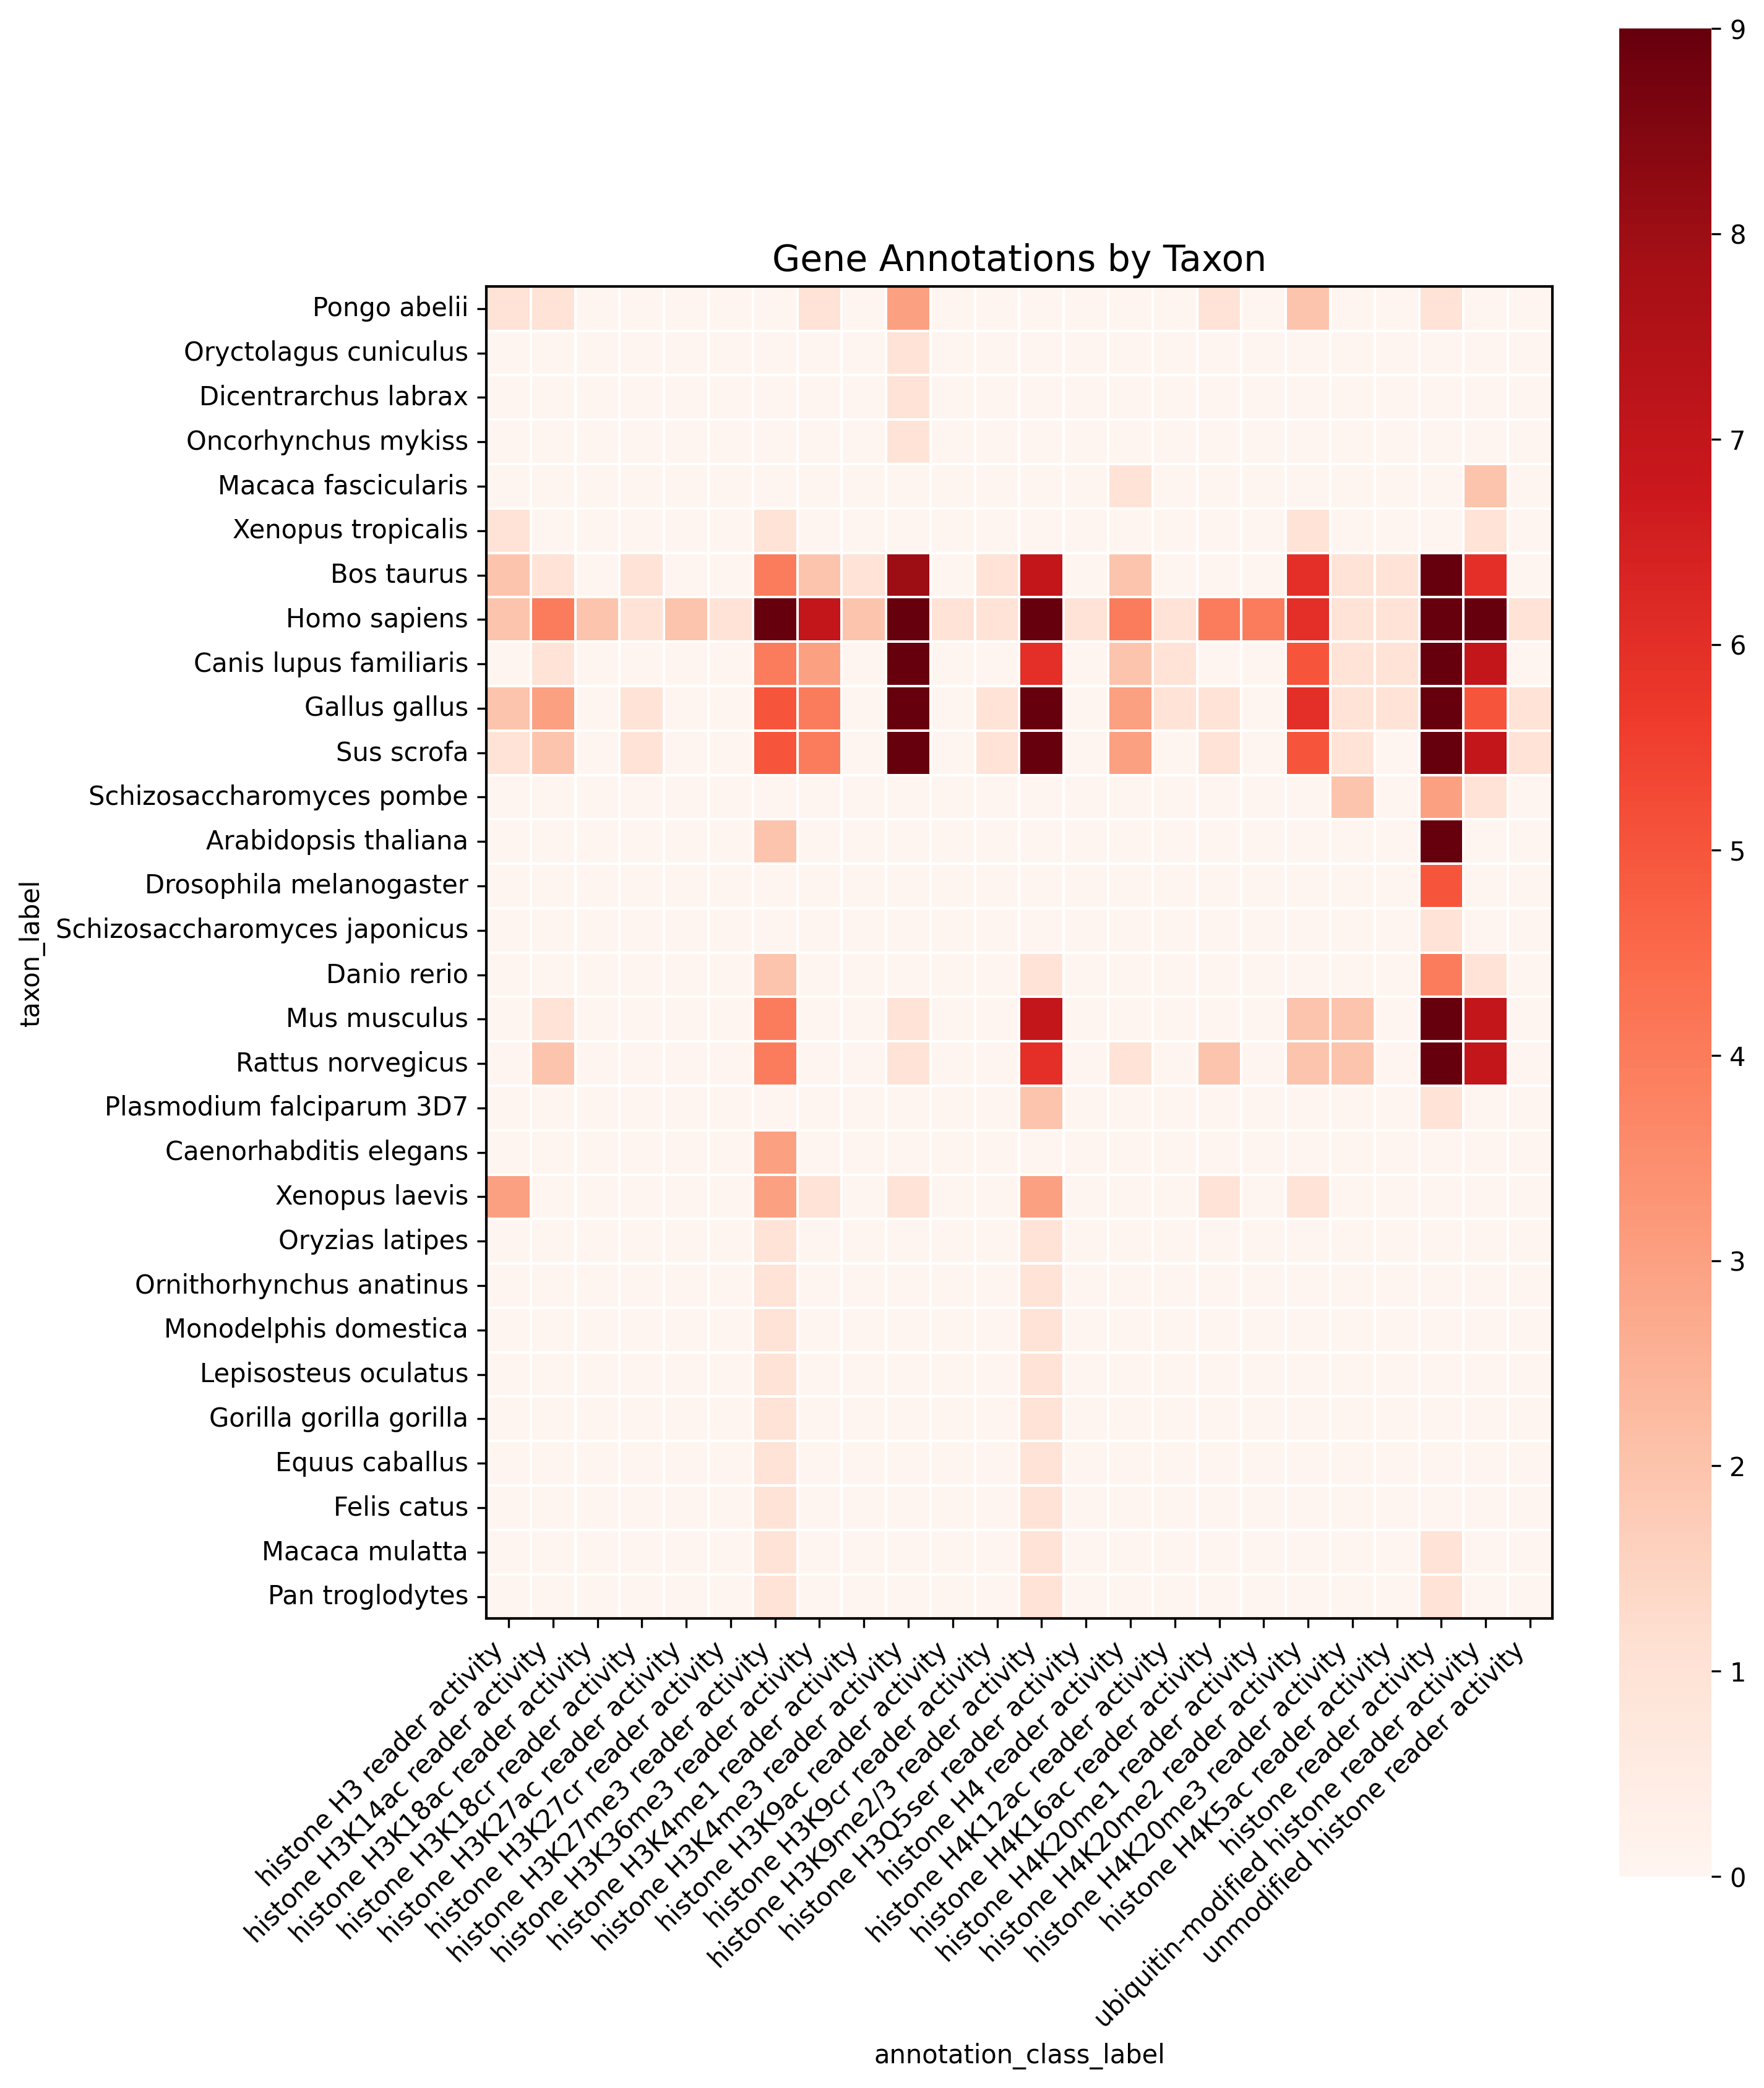

In [6]:
from IPython.display import Image
Image(filename='output/custom_heatmap.png', width=800)

In this example, we:
- Only clustered the y-axis (taxa)
- Used the average linkage method with correlation distance
- Applied a red color scheme
- Added a title
- Made cells square
- Removed value annotations for a cleaner look
- Used robust quantile scaling for better color distribution

## 5. Exporting the Heatmap Data

Sometimes you might want to save the processed data that goes into the heatmap. The `--export-data` option allows this:

In [7]:
!cat output/gene_annotations.csv | \
    linkml-store plot heatmap \
    -f csv \
    -x annotation_class_label \
    -y taxon_label \
    --cluster both \
    -o output/heatmap_with_export.png \
    --export-data output/heatmap_data.csv

NameError: name 'plt' is not defined


In [8]:
!head -n 5 output/heatmap_data.csv

head: output/heatmap_data.csv: No such file or directory


## 6. Using Value Columns Instead of Counts

By default, heatmaps show the frequency counts of each x-y combination. However, you can specify a different value column to use instead.

For this example, let's create a sample dataset that includes a value column:

In [9]:
import pandas as pd
import numpy as np

# Sample data with gene expression values across tissues and conditions
data = {
    'gene': np.repeat(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5'], 4),
    'tissue': np.tile(['Brain', 'Heart', 'Liver', 'Kidney'], 5),
    'expression': np.random.uniform(0, 10, 20)  # Random expression values
}

df = pd.DataFrame(data)
df.to_csv('output/gene_expression.csv', index=False)
df.head()

,gene,tissue,expression
0,Gene1,Brain,3.609874
1,Gene1,Heart,4.452595
2,Gene1,Liver,0.565133
3,Gene1,Kidney,1.141736
4,Gene2,Brain,5.924680


In [10]:
!cat output/gene_expression.csv | \
    linkml-store plot heatmap \
    -f csv \
    -x tissue \
    -y gene \
    -v expression \
    --cluster both \
    --cmap "viridis" \
    --title "Gene Expression by Tissue" \
    -o output/expression_heatmap.png

Heatmap created at output/expression_heatmap.png


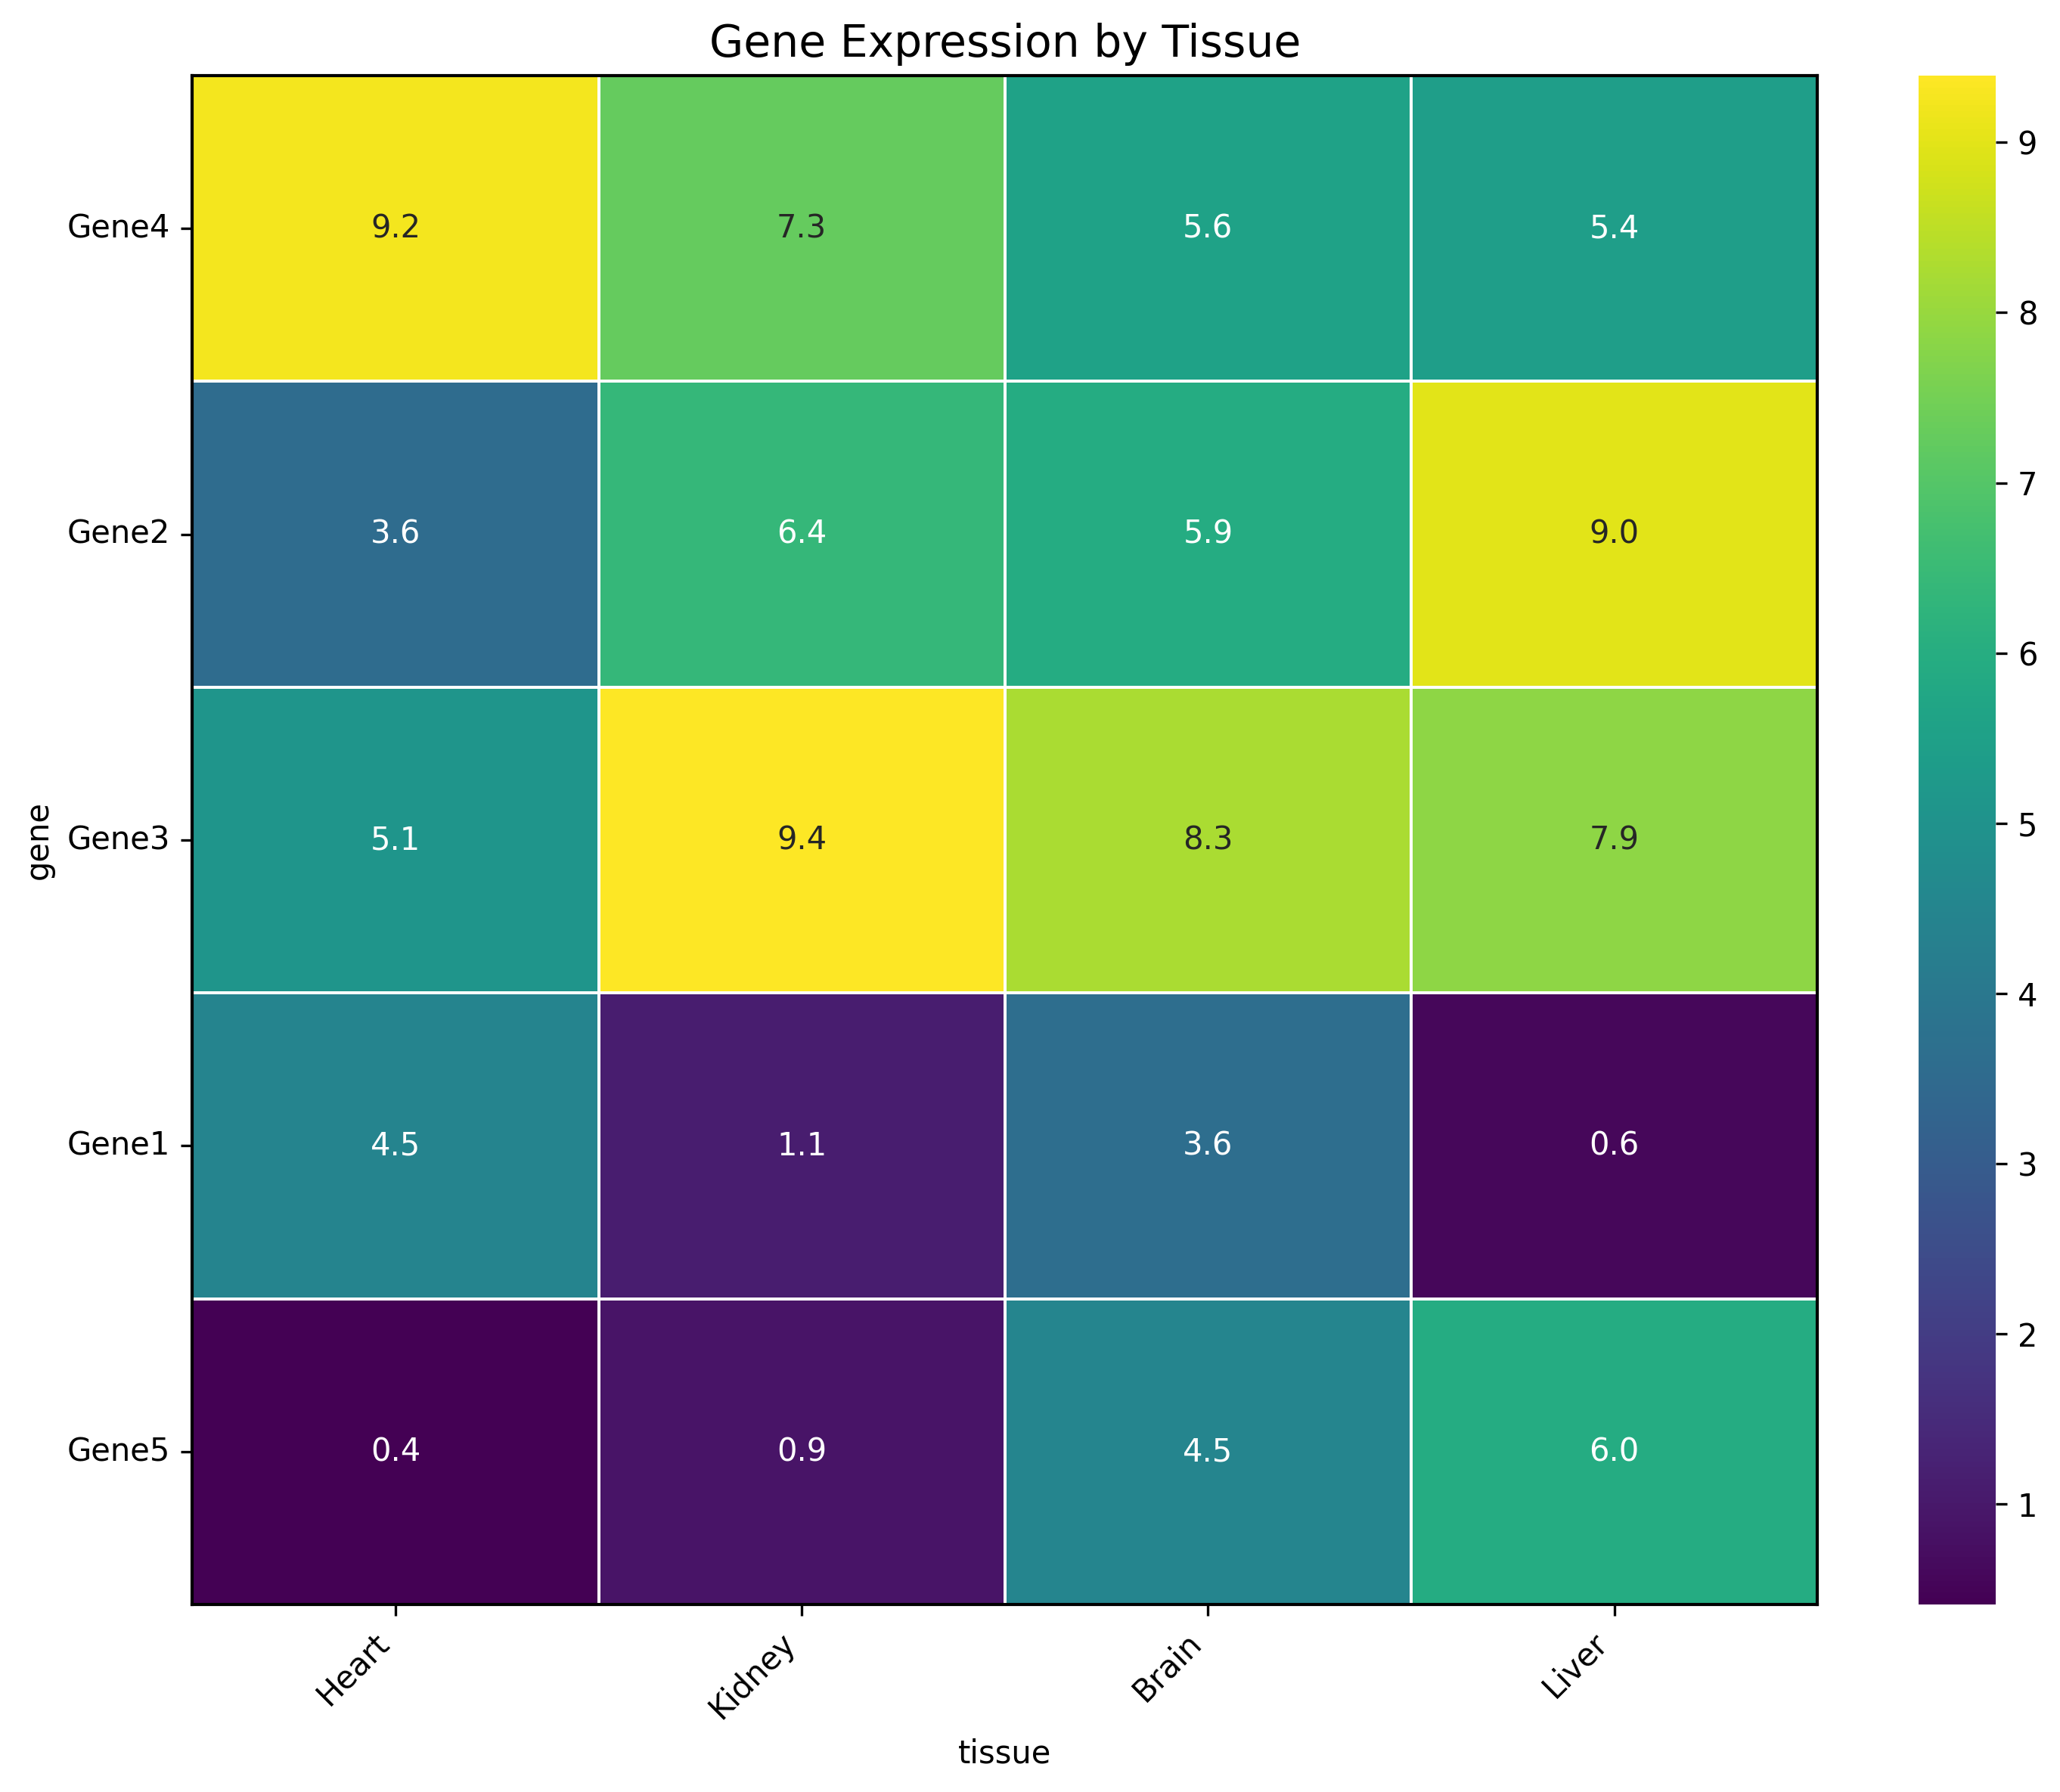

In [11]:
from IPython.display import Image
Image(filename='output/expression_heatmap.png', width=800)

Here, we used the `expression` column as the value for each cell, rather than counting occurrences. Notice how the annotations now show the actual expression values rather than integer counts.

## 7. Pipeline Integration

One of the most powerful features of the LinkML-Store plotting functionality is the ability to integrate it into data processing pipelines. By using standard Unix pipes, you can directly feed query results into the plotting command.

Here's a complete pipeline example that showcases this workflow:

In [12]:
%%bash
# Query the database and pipe directly to the heatmap command
linkml-store -d amigo query \
    -s '[bioentity,annotation_class_label,taxon_label]' \
    -w "{isa_partof_closure: GO:0140566, document_category: annotation}" \
    -l 999999 \
    -O csv | \
linkml-store plot heatmap \
    -f csv \
    -x annotation_class_label \
    -y taxon_label \
    --cluster both \
    --cluster-method ward \
    --cluster-metric cosine \
    --title "Gene Annotations by Taxon" \
    -o output/pipeline_heatmap.png

Heatmap created at output/pipeline_heatmap.png


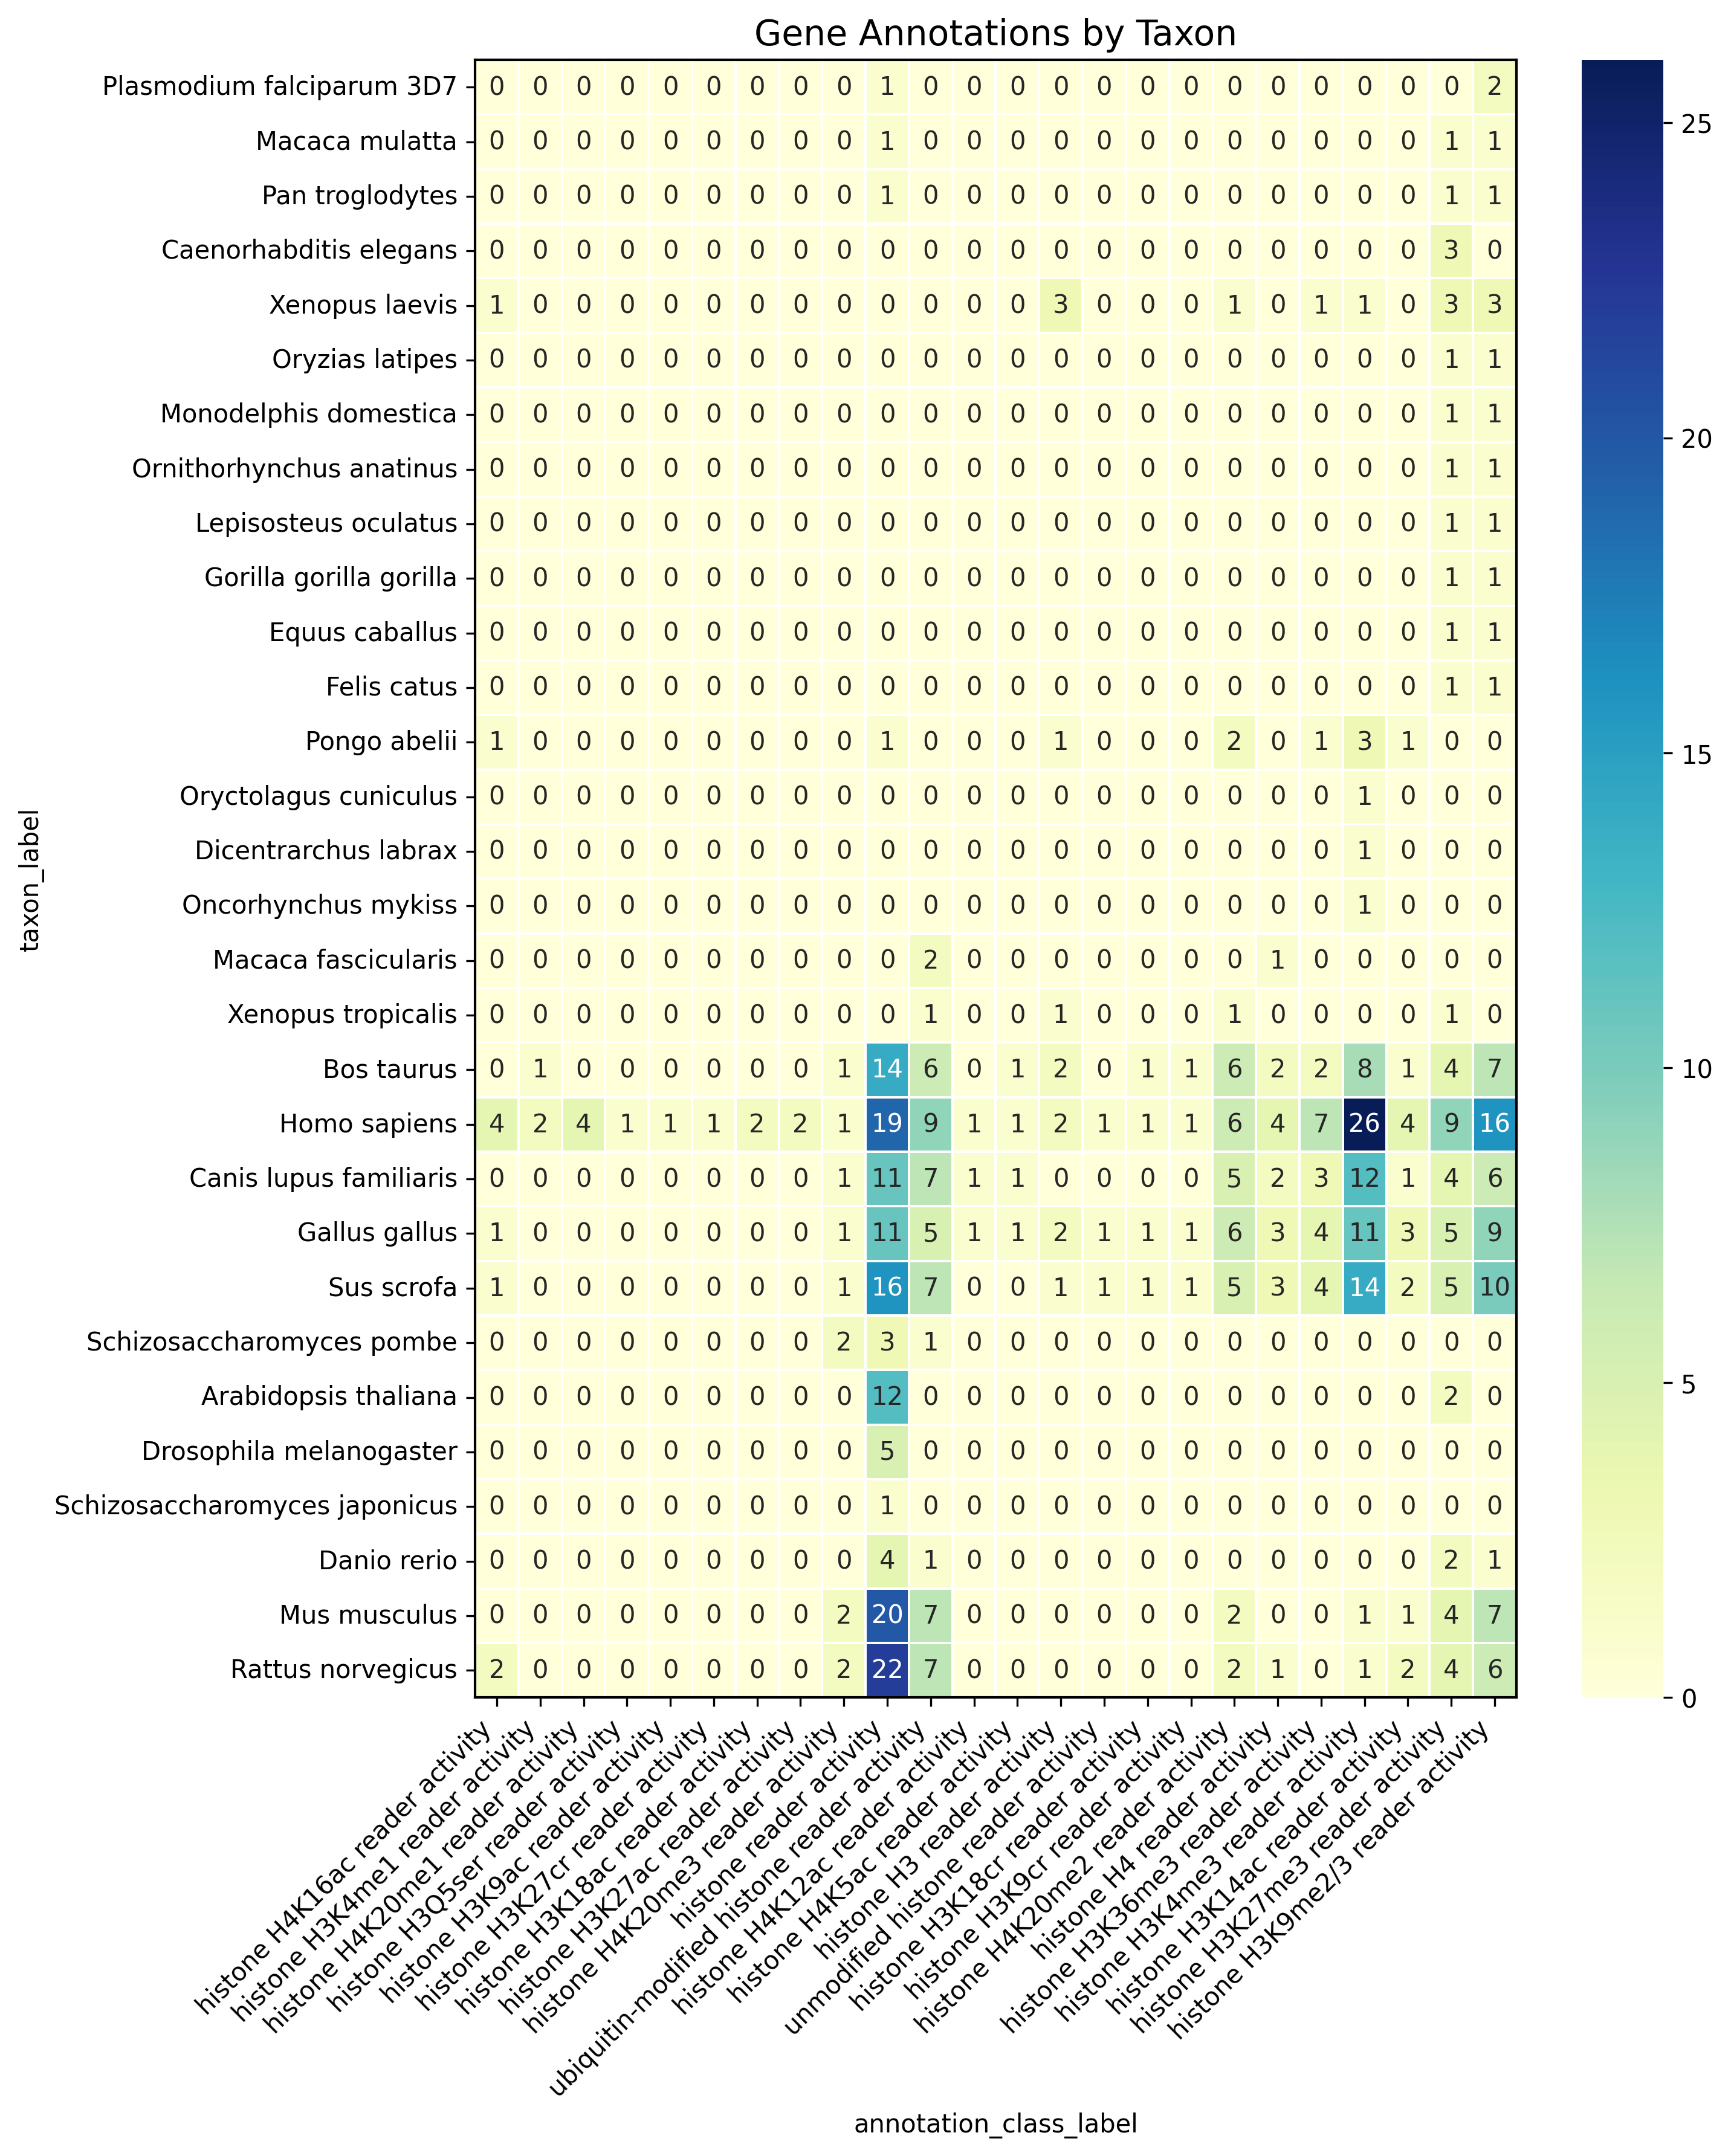

In [13]:
from IPython.display import Image
Image(filename='output/pipeline_heatmap.png', width=800)

This pipeline approach allows you to:
1. Query data directly from a database
2. Process it without saving intermediate files
3. Generate visualizations in a single command

It's particularly useful for exploratory data analysis and for creating visualizations as part of automated workflows.

## 8. Conclusion

The LinkML-Store heatmap functionality provides a powerful tool for visualizing relationships in your data. Key takeaways:

- Heatmaps help identify patterns across two categorical variables
- LinkML-Store's command-line interface makes it easy to create heatmaps from query results
- Hierarchical clustering helps reveal structure by grouping similar rows and columns
- Various customization options allow you to tailor the visualization to your needs
- Pipeline integration enables efficient workflows without intermediate files

By incorporating these heatmap visualizations into your data analysis workflow, you can more easily identify patterns, outliers, and relationships in your data.